In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import feature_engine.imputation as fei

In [2]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml(name='miceprotein')
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m


In [3]:
X = data.drop(['class'],axis=1)
y = data['class']

In [4]:
# Mean-median imputation
mean_impute_col = []
median_impute_col = []
for column in X.columns:
    if (X[column].skew() >-0.5) & (X[column].skew() <0.5):
        mean_impute_col.append(column) #Fairly symmetrical distributions
    else:
        median_impute_col.append(column) # Moderate to large skewness

imputer = fei.MeanMedianImputer('mean')
X[mean_impute_col] = imputer.fit_transform(X[mean_impute_col])

imputer = fei.MeanMedianImputer('median')
X[median_impute_col] = imputer.fit_transform(X[median_impute_col])

In [5]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Dimensionality Reduction

For most machine learning algorithms, model performance improves when having more features introduced until having too many features may result in worse model performance. This phenomenon is known as <b>curse of dimensionality</b>.

Dimensionality reduction is a feature selection technique that reduces the number of dimensions in the dataset without losing significant information of the original dataset.

To overcome the curse of dimensionality, there are two main approaches:
1. <b>Projection</b>: Mapping higher dimensional space to lower dimensional space perpendicularly


2. <b>Manifold Learning</b>: Mapping higher dimensional space to lower dimensional space using non-linear transformation
- Manifold refers to any 2-D shape that can be transformed to fit in higher-dimensional space by twisting or bending it
- Manifold learning assumes that real-world high dimensional datasets lie close to much lower dimensional manifold.

The following learning algorithms are the most popular ones used for dimensionality reduction:
1. PCA (Principal Component Analysis)
2. LLE (Locally Linear Embedding)
3. LDA (Linear Discriminant Analysis) - Supervised method

## PCA (Principal Component Analysis)

Principal components analysis (PCA) is the most popular unsupervised method used for dimensionality reduction. 

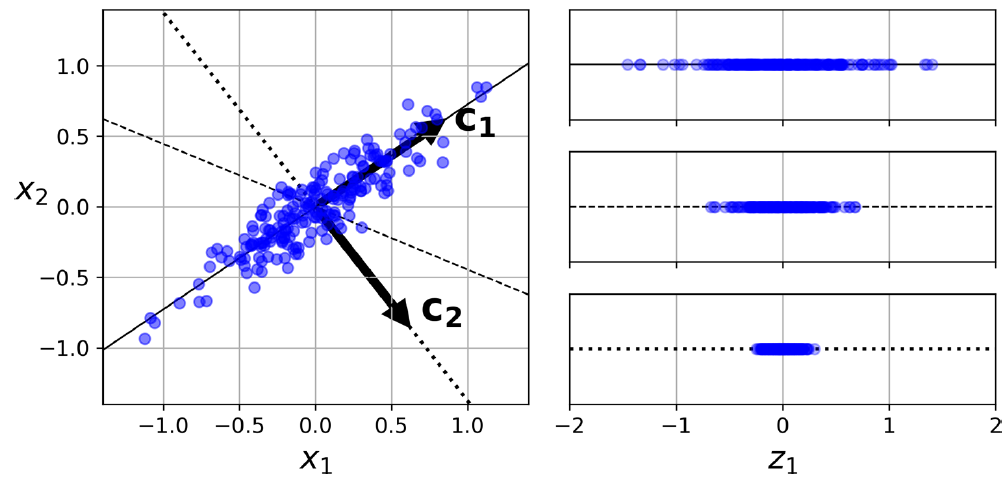

Principal components are derived features in the form of linear combination of original features, which the first principal component explains the maximum variance of the data and so on.

<b>Assumption of PCA</b>: Mean of all features is zero and standard deviation of all features is one (Centered around origin)

<b>Steps involved in PCA</b>:

1. Compute average of magnitude of all points.

2. Perform parallel translation of all points, such that the average point is on the origin

3. Identify best fit line that minimizes distance from individual data points and maximizes distance from origin, which is the <b>first principal component</b>

4. Second principal component line is simply orthogonal (perpendicular) to first principal component line and its location is determined by the maximum of <b>explained variance ratio</b>

<b>Advantages of PCA:</b>
1. Removes correlated features
2. Reduce model training time
3. Reduce risk of model overfitting
4. Provides better visualizations for lower dimensional data
5. Ability to handle noise

<b>Disadvantages of PCA:</b>
1. Principal components are less interpretable
2. Information loss if explained variance ratio threshold is not properly set

<b>Overall time complexity of PCA: O(n × p^2) + O(p^3)</b>
- n: Number of training samples
- p: Number of dimensions

Mathematically, principal components are determined by using <b>Singular Value Decomposition (SVD)</b> technique, which decomposes training set X into three different matrices as follows:

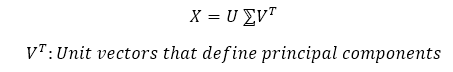

<b>Explained variance ratio</b> measures the amount of variance that each principal component is able to explain.

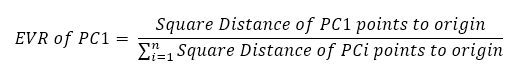

Methods to determine optimum number of principal components:
1. Set threshold of explained variance ratio
2. Plot cumulative explained variance ratio with respect to number of dimensions to determine elbow point.

<b>Note that PCA is mostly suitable for continuous variables only after feature scaling, because PCA is designed to minimize variance which is not meaningful for binary data.</b>

Other versions of PCA in sklearn:
1. <b>Randomized PCA</b>: Stochastic algorithm that approximates the first d principal components specified.
2. <b>Kernel PCA</b>: Similar to SVM, it uses kernel trick for performing PCA algorithm
3. <b>Incremental PCA</b>: Used for very large datasets, which can be split into mini batches for online training.

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(X_scaled)

PCA(n_components=0.99)

In [7]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25350327, 0.42261804, 0.52605524, 0.60192731, 0.65329176,
       0.69904853, 0.73500936, 0.76533618, 0.78842574, 0.8057064 ,
       0.82060751, 0.83304124, 0.8445685 , 0.85568167, 0.8657386 ,
       0.87431008, 0.8820058 , 0.88963517, 0.89606985, 0.90202285,
       0.90786622, 0.91340783, 0.91856545, 0.92361474, 0.92851028,
       0.93290219, 0.93710922, 0.94110071, 0.9445154 , 0.94786271,
       0.95092449, 0.95385813, 0.9566114 , 0.95923429, 0.96153533,
       0.963685  , 0.96581495, 0.9678663 , 0.96982949, 0.97163282,
       0.9733466 , 0.97497344, 0.97648351, 0.97795953, 0.97938325,
       0.98071932, 0.98202512, 0.9832627 , 0.98445017, 0.98557961,
       0.9866258 , 0.98763296, 0.98859272, 0.98948975, 0.9903488 ])

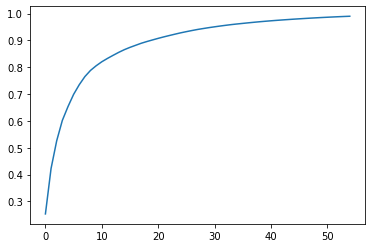

In [8]:
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

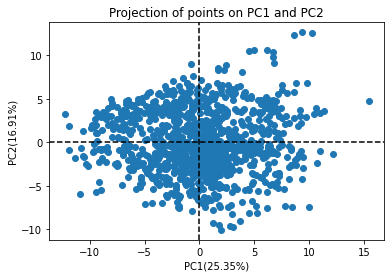

In [9]:
pca = PCA(n_components=2)
X_proj = pca.fit_transform(X_scaled)
plt.scatter(X_proj[:,0],X_proj[:,1])
plt.title('Projection of points on PC1 and PC2')
plt.axhline(0,linestyle="--",color='black')
plt.axvline(0,linestyle="--",color='black')
plt.xlabel(f'PC1({np.round(pca.explained_variance_ratio_[0]*100,2)}%)')
plt.ylabel(f'PC2({np.round(pca.explained_variance_ratio_[1]*100,2)}%)')
plt.show()

In [10]:
# Components score of 1st principal component
pd.DataFrame(pca.components_[0],index=X.columns,columns=['Influence_score']).sort_values(by='Influence_score',ascending=False)

,Influence_score
NR1_N,0.196936
BDNF_N,0.196608
MEK_N,0.195294
TRKA_N,0.193799
pNR2B_N,0.193068
...,...
AcetylH3K9_N,-0.025218
EGR1_N,-0.030155
H3MeK4_N,-0.033527
BAD_N,-0.037715


In [11]:
# Components score of 2nd principal component
pd.DataFrame(pca.components_[1],index=X.columns,columns=['Influence_score']).sort_values(by='Influence_score',ascending=False)

,Influence_score
CaNA_N,0.202815
ITSN1_N,0.194364
GSK3B_N,0.191716
pERK_N,0.187948
DYRK1A_N,0.184882
...,...
H3MeK4_N,-0.169129
EGR1_N,-0.174824
Ubiquitin_N,-0.187143
P38_N,-0.209096


## LLE (Locally Linear Embedding)

Locally Linear Embedding is a manifold learning technique, which does not rely on projections.

LLE method measures how each training instance linearly relates to its closest neighbors and then search for low dimensional representation, where these local relationships are best preserved.

<b>Assumption of LLE:</b> There is sufficient points, such that local neighborhood of samples around every point can be detected.

<b>Steps involved in LLE</b>:

<img src = "https://cs.nyu.edu/~roweis/lle/images/llef2med.gif" width="300">

1. Find K nearest neighbors for every data point

2. Reconstruct new data points as weighted aggregation of its neighbors, such that the following cost function is minimized by optimizing weights:
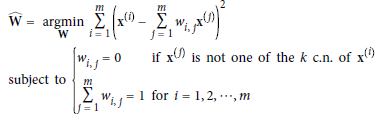


3. Map training instances into new dimensional space, such that the following cost function is minimized by optimizing positions of instances:
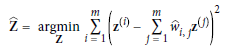

<b>Advantages of LLE:</b>
1. Able to detect non-linear relationships that kernel PCA could not detect
2. Better computational time than most dimensionality reduction algorithms

<b>Disadvantages of LLE:</b>
1. Not suitable for non-convex manifolds

<b>Overall time complexity of standard LLE: O(Dlog(k)Nlog(N)) + O(DNk^3) + O(dN^2)</b>
- N: number of training instances
- D: input dimension
- k: number of nearest neighbors
- d: output dimension
    
Other versions of LLE in sklearn:
1. <b>Modified LLE</b>: Uses multiple weight vectors in each neighborhood to address regularization problem
2. <b>Hessian LLE</b>: Uses hessian-based quadratic form at each neighborhood to recover locally linear structure.

In [12]:
X_scaled

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.313350,0.518471,2.253669,1.497362,2.304588,-0.344885,-0.158601,-0.899416,0.604115,0.691885,...,-1.305403,-1.286899,-0.164944,-1.066276,-0.972480,-0.285744,-0.973682,-1.367167,-1.540161,1.065901
1,0.357433,0.287052,1.880279,1.420009,1.976995,-0.517992,-0.334523,-0.962530,0.442658,0.360253,...,-0.906725,-1.511815,-0.164944,-1.046167,-1.147005,-0.067645,-1.025367,-1.276125,-1.479437,1.280291
2,0.335603,0.451006,2.012928,1.124860,1.909375,-0.581163,-0.226891,-0.969347,0.543335,0.285024,...,-1.138611,-1.443018,-0.164944,-0.926271,-1.064360,-0.155059,-1.027034,-1.323973,-1.555782,1.857038
3,0.066132,0.000465,0.802123,0.489481,1.219480,-0.247290,-0.199461,-1.070704,-0.171236,0.357483,...,-1.192887,-0.905279,-0.164944,-1.285019,-0.845461,-0.818989,-0.686310,-0.936981,-1.152691,1.144490
4,0.037342,0.001873,0.805692,0.197652,0.939439,-0.482624,-0.304516,-1.084849,-0.627671,0.162535,...,-0.727242,-1.011791,-0.164944,-1.172895,-0.870119,-0.179502,-0.905652,-1.132915,-1.122074,1.583530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.686104,-0.610570,-1.303022,-0.591916,-1.335295,-0.515599,-0.392136,-0.814334,-0.161617,-0.794991,...,1.686625,1.268653,-0.164944,-0.400501,2.282701,-1.084095,2.778917,0.635355,2.603399,0.085303
1076,-0.616453,-0.568484,-1.368405,-0.391978,-1.118996,0.435808,0.024078,-0.791905,0.115758,-0.745256,...,1.950957,1.267905,-0.164944,-0.554066,1.950612,-1.066451,2.905065,0.518682,1.881022,0.084215
1077,-0.791202,-0.882924,-1.723830,-1.627251,-1.742414,-0.300726,-0.756205,-1.196458,-0.842679,-1.167541,...,2.214507,2.255706,-0.164944,-0.180275,1.196235,-0.360708,2.825345,1.309532,3.160031,0.293525
1078,-0.821160,-0.812399,-1.523876,-1.214259,-1.567152,-0.583911,-0.304649,-1.121966,-0.631176,-1.085464,...,2.761775,2.465965,-0.164944,0.264492,2.845791,-0.728860,3.094478,1.917497,3.369964,0.208996


In [13]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2,eigen_solver='dense')
lle.fit(X_scaled)

LocallyLinearEmbedding(eigen_solver='dense')

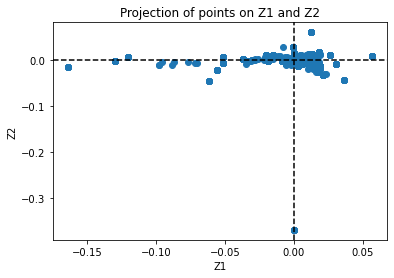

Reconstruction error: -1.6086476861411228e-15


In [14]:
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense')
X_proj = lle.fit_transform(X_scaled)
plt.scatter(X_proj[:,0],X_proj[:,1])
plt.title('Projection of points on Z1 and Z2')
plt.axhline(0,linestyle="--",color='black')
plt.axvline(0,linestyle="--",color='black')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()
print(f"Reconstruction error: {lle.reconstruction_error_}")

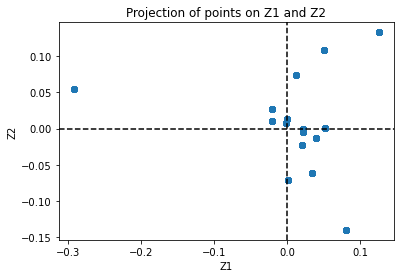

Reconstruction error: 3.397507905286032e-15


In [15]:
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense', method='modified')
X_proj = lle.fit_transform(X_scaled)
plt.scatter(X_proj[:,0],X_proj[:,1])
plt.title('Projection of points on Z1 and Z2')
plt.axhline(0,linestyle="--",color='black')
plt.axvline(0,linestyle="--",color='black')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()
print(f"Reconstruction error: {lle.reconstruction_error_}")

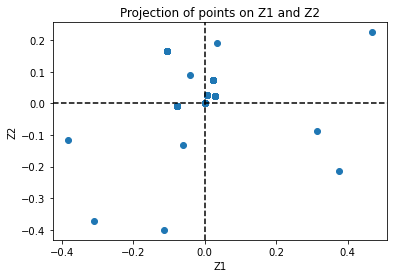

Reconstruction error: -1.0117931770487724e-15


In [16]:
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense', method='hessian',n_neighbors=6)
X_proj = lle.fit_transform(X_scaled)
plt.scatter(X_proj[:,0],X_proj[:,1])
plt.title('Projection of points on Z1 and Z2')
plt.axhline(0,linestyle="--",color='black')
plt.axvline(0,linestyle="--",color='black')
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.show()
print(f"Reconstruction error: {lle.reconstruction_error_}")